In [44]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [46]:
train = pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv("/kaggle/input/titanic/test.csv")

#create copy of test
testcopy = test.copy()

In [47]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [48]:
test.head(20)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [49]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [50]:
#count of missing values
train.isna().sum() , test.isna().sum()

(PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 Age            177
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          687
 Embarked         2
 dtype: int64,
 PassengerId      0
 Pclass           0
 Name             0
 Sex              0
 Age             86
 SibSp            0
 Parch            0
 Ticket           0
 Fare             1
 Cabin          327
 Embarked         0
 dtype: int64)

In [51]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

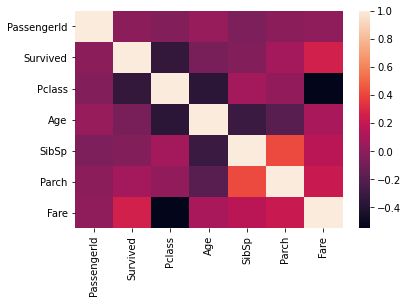

In [52]:
sns.heatmap(train.corr())

In [53]:
#drop some columns 
drop_col = ['Cabin', 'Name', 'Ticket', 'Fare', 'Embarked','PassengerId']

#axis = 1 for column , 0 for row
train.drop(drop_col,axis = 1,inplace= True )
test.drop(drop_col,axis = 1,inplace= True)

#check 
test.head()

,Pclass,Sex,Age,SibSp,Parch
0,3,male,34.5,0,0
1,3,female,47.0,1,0
2,2,male,62.0,0,0
3,3,male,27.0,0,0
4,3,female,22.0,1,1


In [54]:
#for NA in Age put the median

train['Age'].fillna(train['Age'].median(), inplace = True)
test['Age'].fillna(test['Age'].median(),inplace=True)

In [55]:
#check if there are still NAs
train.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
dtype: int64

In [56]:
#visualization 
import matplotlib.pyplot as plt

#bargraph
male = train[train['Sex']=='male']['Survived'].value_counts()
females = train[train['Sex']=='female']['Survived'].value_counts()

male_ns = train[train['Sex']=='male']['Survived'].value_counts()
female_ns= train[train['Sex']=='female']['Survived'].value_counts()



<AxesSubplot:xlabel='Survived', ylabel='count'>

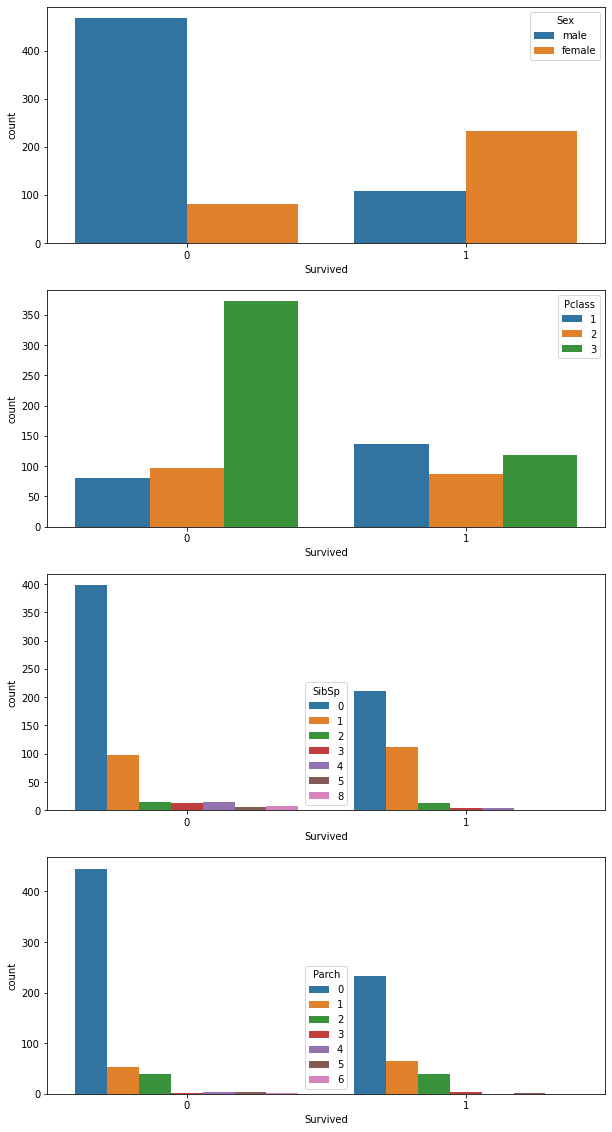

In [57]:
import seaborn as sns
fig, ax = plt.subplots(4,1,figsize=(10,20))
sns.countplot(x='Survived',hue='Sex',data=train,ax=ax[0])
sns.countplot(x='Survived',hue='Pclass',data=train,ax=ax[1])
sns.countplot(x='Survived',hue='SibSp',data=train,ax=ax[2])
sns.countplot(x='Survived',hue='Parch',data=train,ax=ax[3])


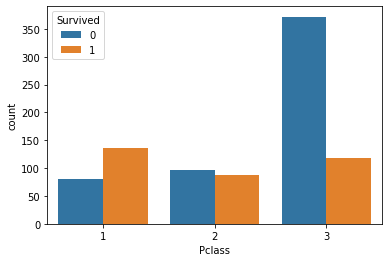

In [58]:
ax = sns.countplot(x="Pclass", hue="Survived", data=train)

In [59]:

import plotly.graph_objects as go

from plotly.subplots import make_subplots

In [60]:
fig=make_subplots(rows=1, cols=2)

fig.add_trace(
    go.Box(y=train['Age'],name="Age"), row=1, col=1)
fig.add_trace(
    go.Box(y=train['Pclass'],name='Pclass'), row=1, col=2)

fig.show()


In [61]:
from sklearn.preprocessing import LabelEncoder

#label encoder

le = LabelEncoder()
train['Sex'] = le.fit_transform(train['Sex'])
test['Sex'] = le.fit_transform(test['Sex'])

#get the classes ??
list(le.inverse_transform([1]))

['male']

In [62]:
#create copy of train data
traincopy=train

#create test and train data
ytrain = train['Survived']
xtrain = train.drop(columns= ['Survived'],axis = 1)


In [63]:
xtrain.head()

,Pclass,Sex,Age,SibSp,Parch
0,3,1,22.0,1,0
1,1,0,38.0,1,0
2,3,0,26.0,0,0
3,1,0,35.0,1,0
4,3,1,35.0,0,0


In [64]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

In [65]:
x_train, x_test, y_train, y_test = train_test_split(xtrain, ytrain,test_size=.3,random_state=12)


In [66]:

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=0.09, random_state=1)
lr.fit(x_train, y_train)
lr.score(x_test, y_test)

0.7761194029850746

In [67]:

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score

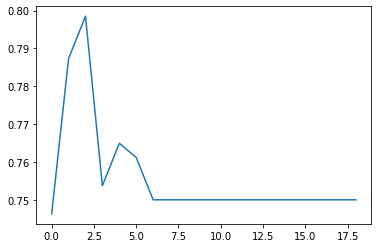

(2, 0.7985074626865671)

In [68]:
from sklearn.tree import DecisionTreeClassifier
scores = []
for n in range(2, 40, 2):
    tree = DecisionTreeClassifier(max_depth=n, random_state=42)
    tree.fit(x_train, y_train)
    scores.append(tree.score(x_test, y_test))
plt.plot(scores)
plt.show()
scores.index(max(scores)), max(scores)

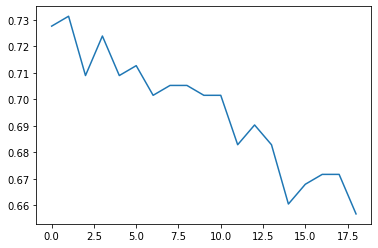

(1, 0.7313432835820896)

In [69]:
scores = []
for n in range(2, 40, 2):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(x_train, y_train)
    scores.append(knn.score(x_test, y_test))
plt.plot(scores)
plt.show()
scores.index(max(scores)), max(scores)

In [70]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [95]:
lgb = LGBMClassifier(learning_rate=0.1,min_child_samples=15,reg_alpha=0.5,reg_lambda=5)
lgb.fit(x_train,y_train)
accuracy_score(y_test,lgb.predict(x_test))

0.7947761194029851

In [72]:
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
accuracy_score(y_test,xgb.predict(x_test))

[14:41:25] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



0.7761194029850746

In [73]:
lgbpred= lgb.predict(test)
lgbpred

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [74]:
resultData=pd.DataFrame(lgbpred,columns=["Survived"])
resultData

,Survived
0,0
1,0
2,0
3,0
4,0
...,...
413,0
414,1
415,0
416,0


In [76]:
testcopy.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [83]:
titanic_PassId=pd.DataFrame(testcopy["PassengerId"],columns= ["PassengerId"])
titanic_PassId.head()

,PassengerId
0,892
1,893
2,894
3,895
4,896


In [84]:
Result=titanic_PassId.join(resultData)
Result.to_csv("titanic_results.csv",index=None)

In [87]:
Result.shape


(418, 2)